In [1]:
import os
import random
import numpy as np
import pandas as pd
from random import sample
import statistics as stats
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import RandomizedSearchCV

In [2]:
Train_multi= pd.read_csv('Train_multiclass.csv')
Test_multi= pd.read_csv('Test_multiclass.csv')

In [3]:
X_train_multi=Train_multi.drop(['Multiple label', 'Binary label','ID'], axis = 1) 
y_train_multi=Train_multi['Multiple label']

# Choose a subject
ids= Test_multi['ID']
pacientes=list(set(ids))
paciente=random.choice(pacientes)

X_test_multi=Test_multi.drop(['Binary label'], axis = 1)
X_test_multi = X_test_multi.drop(X_test_multi[X_test_multi['ID']!=paciente].index)
y_test_multi=X_test_multi['Multiple label']
X_test_multi = X_test_multi.drop(['ID','Multiple label'],axis=1)

In [4]:
#Creation of the model and selection of free parameters
clf = SVC(kernel='linear', decision_function_shape='ovr')
modelo_base=clf.fit(X_train_multi,y_train_multi)

In [5]:
Cs =[0.1,1,10,100,1000] 
param_grid = {'C': Cs} 
svc_grid = GridSearchCV(clf, param_grid, scoring='accuracy',cv=5,n_jobs=-1)
svc_grid.fit(X_train_multi, y_train_multi)
best_param=svc_grid.best_params_

In [6]:
svc_clf=svc_grid.best_estimator_

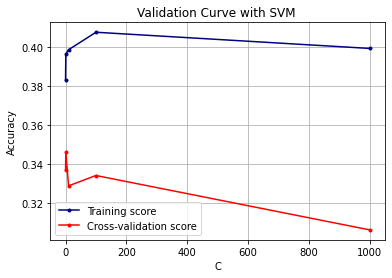

In [7]:
train_scores, test_scores = validation_curve(clf, X_train_multi, y_train_multi, param_name="C", param_range=Cs,cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.title("Validation Curve with SVM ")
plt.xlabel('C')
plt.ylabel("Accuracy")

plt.plot(Cs, train_scores_mean, label="Training score",color="navy",marker='.')
plt.plot(Cs, test_scores_mean, label="Cross-validation score",color="red",marker='.')
plt.grid()
plt.legend(loc="best")
plt.savefig('Image/C parameter_multiple.png' )
plt.show()

In [15]:
print("The optimal value is:",best_param)

The optimal value is: {'C': 1}


In [9]:
print("Base model hit rate:",modelo_base.score(X_test_multi,y_test_multi))
print("Model hit rate with the search for parameters:",svc_clf.score(X_test_multi,y_test_multi))
print('Improved:{:0.2f}%.'.format( 100 * (svc_clf.score(X_test_multi,y_test_multi) - modelo_base.score(X_test_multi,y_test_multi)) / modelo_base.score(X_test_multi,y_test_multi)))

Base model hit rate: 0.5185185185185185
Model hit rate with the search for parameters: 0.5185185185185185
Improved:0.00%.


In [16]:
predict = svc_clf.predict(X_test_multi)
acc_test= svc_clf.score(X_test_multi, y_test_multi).round(4)
acc_train= svc_clf.score(X_train_multi, y_train_multi).round(4)
print('The accuracy for the SVM model in the TEST set is:',acc_test,'\n')
print('The accuracy for the SVM model in the TRAIN set is:',acc_train,'\n')
print("=============== Classification Report ================")
print(classification_report(y_test_multi, predict))

The accuracy for the SVM model in the TEST set is: 0.5185 

The accuracy for the SVM model in the TRAIN set is: 0.3979 

=============== Classification Report ================
              precision    recall  f1-score   support

         0.0       0.67      0.40      0.50         5
         1.0       1.00      0.12      0.22         8
         2.0       0.00      0.00      0.00         3
         3.0       0.52      1.00      0.69        11
         5.0       0.00      0.00      0.00         0

    accuracy                           0.52        27
   macro avg       0.44      0.30      0.28        27
weighted avg       0.63      0.52      0.44        27



d:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-sc

In [11]:
matriz_confusion=pd.crosstab(y_test_multi,predict, rownames=['Predicted class'], colnames=['Classification result'])
matriz_confusion

Classification result,0.0,1.0,3.0,5.0
Predicted class,,,,
0.0,2,0,3,0
1.0,1,1,4,2
2.0,0,0,3,0
3.0,0,0,11,0


In [12]:
y_test_multi=list(y_test_multi)

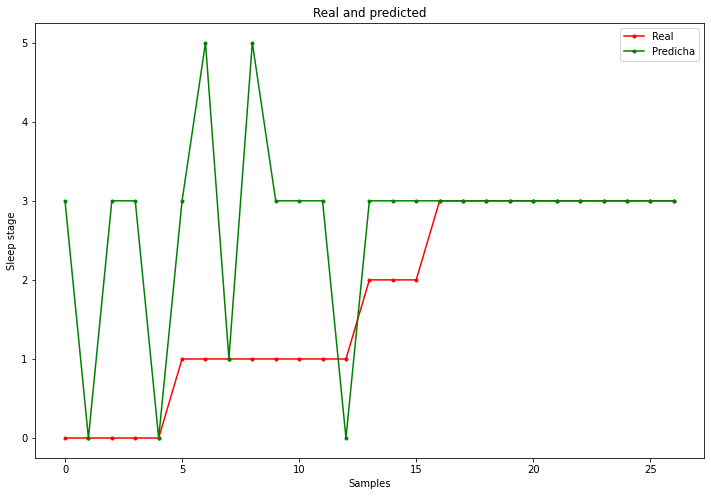

In [13]:
plt.figure(figsize=(12,8))
plt.plot(y_test_multi,color='red', marker='.',label='Real')
plt.plot(predict,color='green', marker='.',label='Predicha')

plt.title('Real and predicted')
plt.xlabel('Samples')
plt.ylabel('Sleep stage')
plt.legend()
plt.savefig('Image/LB_SVM_Multiple.png')

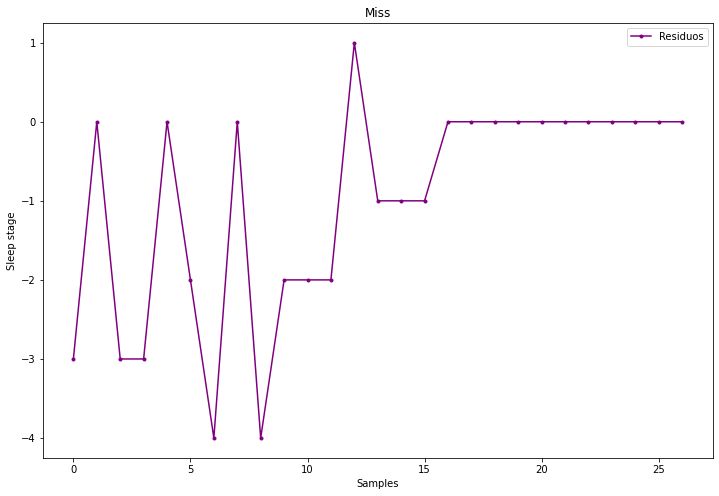

In [14]:
miss= y_test_multi - predict
plt.figure(figsize=(12,8))
plt.plot(miss[0:90],color='purple', marker='.',label='Residuos')

plt.title('Miss')
plt.xlabel('Samples')
plt.ylabel('Sleep stage')
plt.legend()